# Introduction and flat files

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Welcome-to-the-course!" data-toc-modified-id="Welcome-to-the-course!-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Welcome to the course!</a></span></li><li><span><a href="#The-importance-of-flat-files-in-data-science" data-toc-modified-id="The-importance-of-flat-files-in-data-science-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The importance of flat files in data science</a></span><ul class="toc-item"><li><span><a href="#Zen-of-Python" data-toc-modified-id="Zen-of-Python-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Zen of Python</a></span></li></ul></li><li><span><a href="#Importing-flat-files-using-NumPy" data-toc-modified-id="Importing-flat-files-using-NumPy-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing flat files using NumPy</a></span><ul class="toc-item"><li><span><a href="#loadtxt()" data-toc-modified-id="loadtxt()-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>loadtxt()</a></span></li><li><span><a href="#genfromtxt()" data-toc-modified-id="genfromtxt()-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>genfromtxt()</a></span></li><li><span><a href="#np.recfromcsv()" data-toc-modified-id="np.recfromcsv()-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>np.recfromcsv()</a></span></li></ul></li><li><span><a href="#Importing-flat-files-using-Pandas" data-toc-modified-id="Importing-flat-files-using-Pandas-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Importing flat files using Pandas</a></span><ul class="toc-item"><li><span><a href="#Using-pandas-to-import-flat-files-as-DataFrames" data-toc-modified-id="Using-pandas-to-import-flat-files-as-DataFrames-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Using pandas to import flat files as DataFrames</a></span></li><li><span><a href="#Customizing-your-pandas-import" data-toc-modified-id="Customizing-your-pandas-import-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Customizing your pandas import</a></span></li></ul></li></ul></div>

## Welcome to the course!

- Reading a text file
        In [1]: filename = 'huck_finn.txt'
        In [2]: file = open(filename, mode='r')  # 'r' is to read
        In [3]: text = file.read()
        In [4]: file.close()
- Writing to a file
        In [1]: filename = 'huck_finn.txt'
        In [2]: file = open(filename, mode='w')  # 'w' is to write
        In [3]: file.close()
- Context manager 「with」
        In [1]: with open('huck_finn.txt', 'r') as file:
                    print(file.read())

In [1]:
file = open('exercise/CH1.txt', mode = 'r')
print(file.read())
file.close()
print(file.closed)

In [2]:
# Read & print the first 3 lines
with open('exercise/CH1.txt') as file:
    print(file.readline())
    print(file.readline())
    print(file.readline())

## The importance of flat files in data science

- Flat files
    - Text files containing records 
    - Table data, without structured relationship
    - Record: row of fields or attributes 
    - Column: feature or attribute
- File extension
    - .csv 
        - Comma separated values
    - .txt 
        - Text file
    - Delimiters(分隔符)
        - ex: commas, tabs 


### Zen of Python

In [3]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Importing flat files using NumPy

- Why NumPy?
    - NumPy arrays: standard for storing numerical data 
    - Essential for other packages: e.g. scikit-learn
- loadtxt()
    - 能夠指定單一種 data type
            data = np.loadtxt(filename, delimiter=',', skiprows=1, usecols=[0, 2], dtype=str)
    - filename: 檔案位置
    - delimiter=',': 用什麼分割
    - skiprows=1: 跳過幾列
    - usecols=[0, 2]: 用第幾行
    - dtype=str: 指定data type
- genfromtxt()
    - 能夠讓我們取用多種 data type
    - 當 dtype = None 時，每一column 的 data type 由每一 column 自己的元素決定
            data = np.genfromtxt('titanic.csv', delimiter=',', names=True, dtype=None)
    - names=True: 是否有 header? (header = column標籤)，有的話可以利用 key-word 存取column
    - This kind of object alled a structured array
        - Numpy arrays have to contain elements that are all the same type, the structured array solves this by being a 1D array, where each element of the array is a row of the flat file imported. 
    - 存取第 i row:
            data[i]
    - 存取column:
            在names=True時
            data['column_name']
- np.recfromcsv()
    - Similarly to np.genfromtxt(), 
    - But the defaults are
        - delimiter=',' 
        - names=True 
        - dtype=None

### loadtxt()

<class 'numpy.ndarray'>


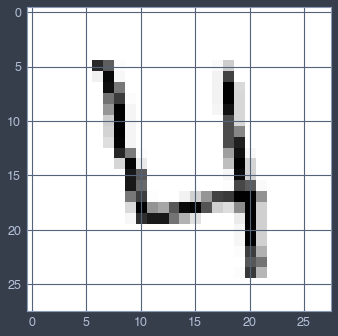

In [4]:
# Import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import jupyterthemes.jtplot as jtplot
%matplotlib inline
jtplot.style(theme='onedork')

# Assign filename to variable: file
file = 'exercise/mnist_kaggle_some_rows.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

# Print datatype of digits
print(type(digits))

# Select and reshape a row
im = digits[3, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()


['Time' 'Percent']
[0.    0.357]


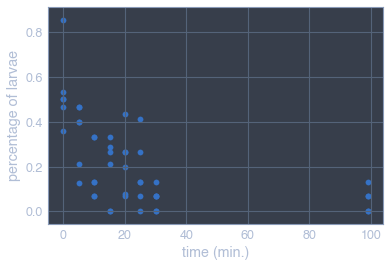

In [5]:
# Assign filename: file
file = 'exercise/seaslug.txt'

# Import file: data
data = np.loadtxt(file, delimiter='\t', dtype=str)

# Print the first element of data
print(data[0])

# Import data as floats and skip the first row: data_float
data_float = np.loadtxt(file, delimiter='\t', dtype=float, skiprows=1)

# Print the 10th element of data_float
print(data_float[9])

# Plot a scatterplot of the data
plt.scatter(data_float[:, 0], data_float[:, 1])
plt.xlabel('time (min.)')
plt.ylabel('percentage of larvae')
plt.show()


### genfromtxt()

In [6]:
data = np.genfromtxt('exercise/titanic_sub.csv', delimiter=',', names=True, dtype=None)
print(data[0:3])

# 查看column names
print(data.dtype)
print(data[0:3]['Sex'])



[(1, 0, 3, b'male', 22., 1, 0, b'A/5 21171',  7.25  , b'', b'S')
 (2, 1, 1, b'female', 38., 1, 0, b'PC 17599', 71.2833, b'C85', b'C')
 (3, 1, 3, b'female', 26., 0, 0, b'STON/O2. 3101282',  7.925 , b'', b'S')]
[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')]
[b'male' b'female' b'female']


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  """Entry point for launching an IPython kernel.


### np.recfromcsv()

In [7]:
d = np.recfromcsv('exercise/titanic_sub.csv')
print(data.dtype)

[('PassengerId', '<i8'), ('Survived', '<i8'), ('Pclass', '<i8'), ('Sex', 'S6'), ('Age', '<f8'), ('SibSp', '<i8'), ('Parch', '<i8'), ('Ticket', 'S18'), ('Fare', '<f8'), ('Cabin', 'S15'), ('Embarked', 'S1')]


/Users/ellick/anaconda3/envs/datacamp/lib/python3.7/site-packages/numpy/lib/npyio.py:2358: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)


## Importing flat files using Pandas

- What a data scientist needs
    - Two-dimensional labeled data structure(s) 
    - Columns of potentially different types 
    - Manipulate, slice, reshape, groupby, join, merge 
    - Perform statistics
    - Work with time series data
- Pandas and the DataFrame
    - DataFrame = pythonic analog of R’s data frame
    - A matrix has rows and columns. A data frame has observations and variables
- Manipulating pandas DataFrames
   - Exploratory data analysis 
   - Data wrangling
   - Data preprocessing 
   - Building models 
   - Visualization
- In this chapter
    - Importing flat files in a straightforward manner
    - Importing flat files with issues such as comments and missing values

### Using pandas to import flat files as DataFrames

In [15]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat

In [21]:
# Assign the filename: file
file = 'exercise/mnist_kaggle_some_rows.csv'

# Read the first 5 rows of the file into a DataFrame: data
# nrows = read first n rows
# header = 指定第幾列作為header，or None for 沒有 header
data = pd.read_csv(file, nrows=1, header=None)

# Build a numpy array from the DataFrame: data_array
data_array = np.array(data)

# Print the datatype of data_array to the shell
print(type(data_array))
print(data)

<class 'numpy.ndarray'>
   0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   

   779  780  781  782  783  784  
0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 785 columns]


### Customizing your pandas import

   PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch  \
0            1         0       3    male  22.0      1      0   
1            2         1       1  female  38.0      1      0   
2            3         1       3  female  26.0      0      0   
3            4         1       1  female  35.0      1      0   
4            5         0       3    male  35.0      0      0   

             Ticket     Fare Cabin Embarked  
0         A/5 21171   7.2500   NaN        S  
1          PC 17599  71.2833   C85        C  
2  STON/O2. 3101282   7.9250   NaN        S  
3            113803  53.1000  C123        S  
4            373450   8.0500   NaN        S  


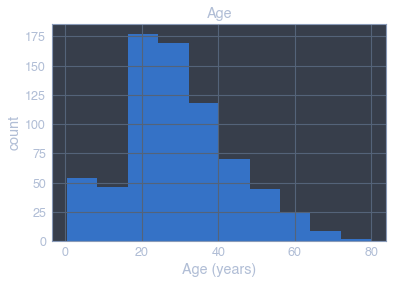

In [23]:


# Assign filename: file
file = 'exercise/titanic_sub.csv'

# Import file: data
data = pd.read_csv(file, sep=',', comment='#', na_values='Nothing')

# Print the head of the DataFrame
print(data.head())

# Plot 'Age' variable in a histogram
pd.DataFrame.hist(data[['Age']])
plt.xlabel('Age (years)')
plt.ylabel('count')
plt.show()
